In [1]:
# Install TensorFlow 1.15.0.
!pip install tensorflow==2.12.0
!pip install pydot
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [2]:
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy as np

data = np.load("katakana_dataset.npz")

images = data['images']
labels = data['labels']

print(f"Images shape: {images.shape}")  # e.g., (num_samples, 48, 48)
print(f"Labels shape: {labels.shape}")  

2025-01-01 13:57:42.832349: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-01 13:57:42.833779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 13:57:42.861162: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 13:57:42.862822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-01 13:57:43.336513: W tensorflow/compiler/tf2t

Images shape: (71959, 63, 64)
Labels shape: (71959,)


In [3]:
max_pixel_value = np.max(images)
images = images / max_pixel_value

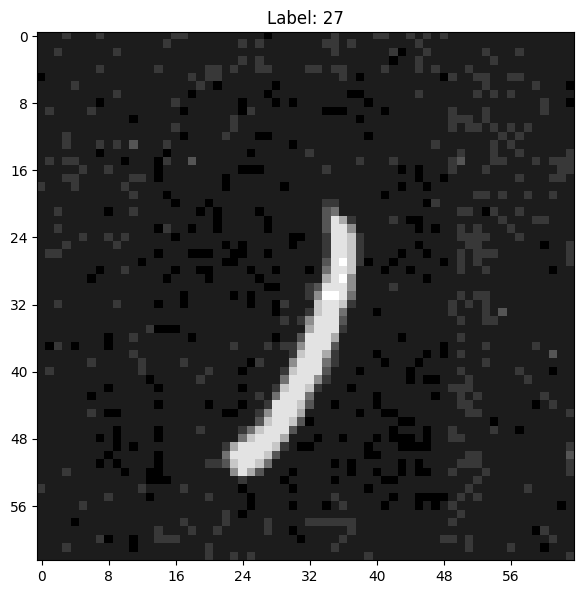

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

j = 34001 
ax.imshow(images[j], cmap='gray') 
ax.set_xticks(range(0, images[j].shape[1], 8))  
ax.set_yticks(range(0, images[j].shape[0], 8)) 
ax.set_title(f"Label: {labels[j]}", fontsize=12) 

plt.tight_layout()
plt.savefig("katakana_example.png") 
plt.show()

In [5]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

train_images, validation_images, train_labels, validation_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42
)

test_images, validation_images, test_labels, validation_labels = train_test_split(
    validation_images, validation_labels, test_size=0.5, random_state=42
)

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")
print(f"Validation images shape: {validation_images.shape}")
print(f"validation labels shape: {validation_labels.shape}")

Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Training images shape: (50371, 63, 64)
Training labels shape: (50371,)
Testing images shape: (10794, 63, 64)
Testing labels shape: (10794,)
Validation images shape: (10794, 63, 64)
validation labels shape: (10794,)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

train_images = train_images.reshape(-1, 63, 64, 1)
test_images = test_images.reshape(-1, 63, 64, 1)
validation_images = validation_images.reshape(-1, 63, 64, 1)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen.fit(train_images)

In [7]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(63, 64, 1)),  
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),  
    layers.Dense(48, activation="softmax")  
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0

2025-01-01 13:57:48.146079: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


/basksir/vhome/mmakiela/.local/lib/python3.9/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


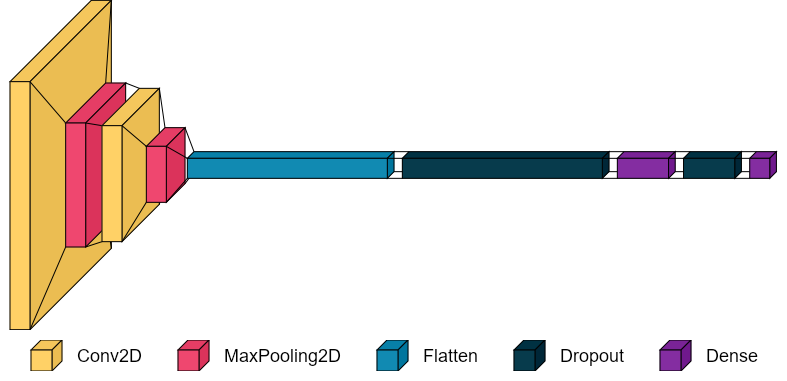

In [9]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 18, encoding="unic")

visualkeras.layered_view(
    model,
    legend=True,
    font=font,
    spacing=15,
    max_z=200,
    to_file='architecture_kata_hira.png'
)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=5,              
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    validation_data=(validation_images, validation_labels),
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


2025-01-01 13:57:49.480097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1575/1575 [==============================] - 45s 28ms/step - loss: 1.1966 - accuracy: 0.6628 - val_loss: 0.2324 - val_accuracy: 0.9362
Epoch 2/50
1575/1575 [==============================] - 44s 28ms/step - loss: 0.4697 - accuracy: 0.8596 - val_loss: 0.1591 - val_accuracy: 0.9596
Epoch 3/50
1575/1575 [==============================] - 44s 28ms/step - loss: 0.3653 - accuracy: 0.8933 - val_loss: 0.1247 - val_accuracy: 0.9704
Epoch 4/50
1575/1575 [==============================] - 44s 28ms/step - loss: 0.3176 - accuracy: 0.9085 - val_loss: 0.1139 - val_accuracy: 0.9752
Epoch 5/50
1575/1575 [==============================] - 45s 28ms/step - loss: 0.2812 - accuracy: 0.9184 - val_loss: 0.1077 - val_accuracy: 0.9765
Epoch 6/50
1575/1575 [==============================] - 45s 28ms/step - loss: 0.2566 - accuracy: 0.9261 - val_loss: 0.0928 - val_accuracy: 0.9795
Epoch 7/50
1575/1575 [==============================] - 44s 28ms/step - loss: 0.2414 - accuracy: 0.9327 - val_loss: 0.1031 - val_accura

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Loss: {test_loss}")

338/338 [==============================] - 2s 6ms/step - loss: 0.0684 - accuracy: 0.9876
Accuracy: 98.76%
Loss: 0.06842978298664093


In [12]:
model.save("katakana_model.h5")

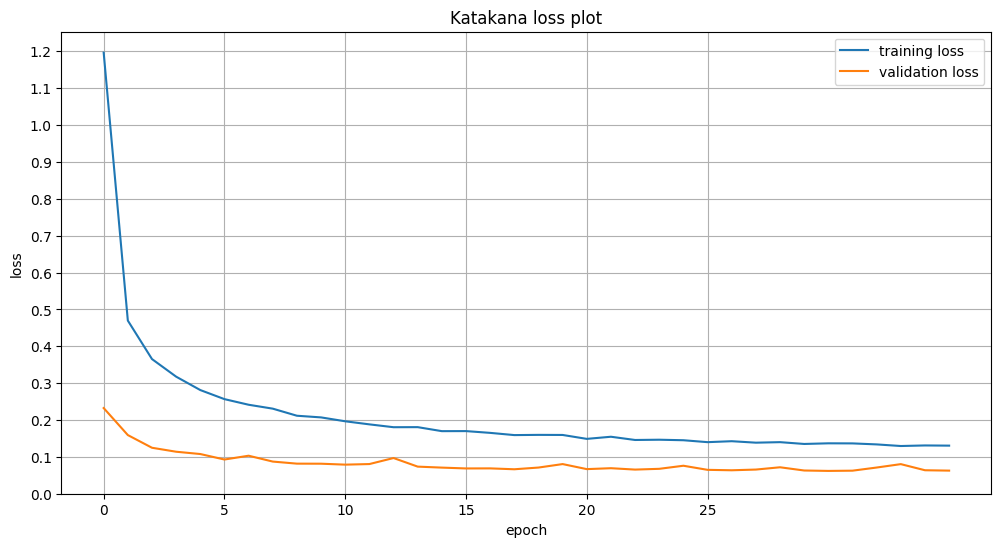

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Katakana loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = fig.gca()
ax.set_xticks(np.arange(0, 27, 5))
ax.set_yticks(np.arange(0, 1.25, 0.1))
plt.grid()
plt.legend()
plt.savefig('loss_katakana.png')
plt.show()
plt.close()

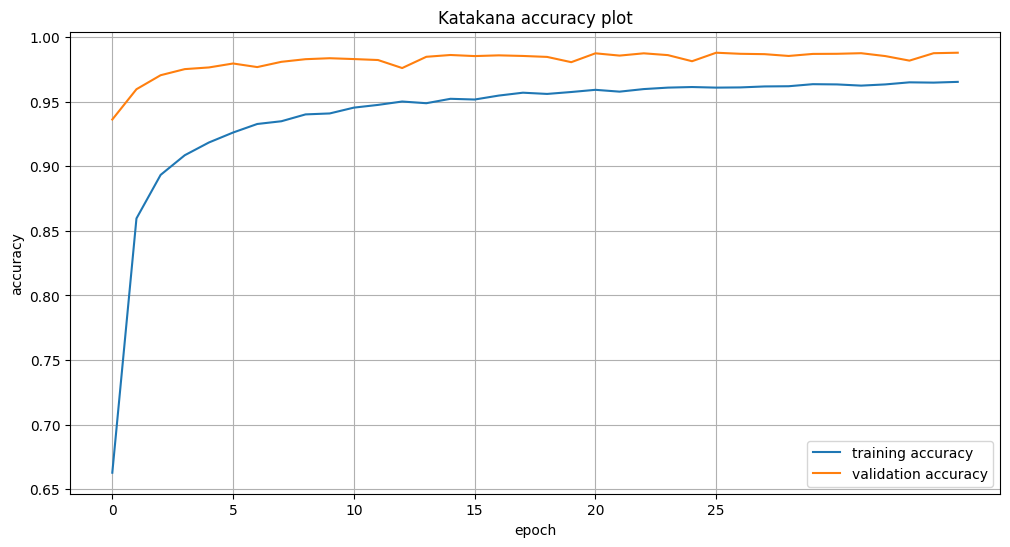

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Katakana accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
ax = fig.gca()
ax.set_xticks(np.arange(0, 27, 5))
plt.grid()
plt.savefig('accuracy_katakana.png')
plt.show()
plt.close()